## EDA Student Performance Indicator
### 1) Problem Statement
 - This project understands how the students's performance (test score) is affected by other variables such as Gender, Ethnicity, Prental level of education, Lunch and Test preparation course.
### 2) Data Collection
 - Dataset Source :- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
 - The data consists of 8 columns and 1000 rows.
### 3) Dataset Information
 - gender : sex of students -> (Male/Female)
 - race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
 - parental level of education : parents' final education -> (bachelor's degree, some college master's degree, associate's degree, high school)
 - lunch : having lunch before test (standard or free/reduced)
 - test preparation course : complete or not complete before test
 - math score
 - reading score
 - writing score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print("Shape of the datset:\n",df.shape) 

Shape of the datset:
 (1000, 8)


### 4. Data Checks to Perform
 - Check Missing values
 - Check Duplicates
 - Chech Data type
 - Check the number of unique values of each column
 - Check the Statistics of the dataset
 - Chech various categories present in the different categorical column

In [5]:
# Missing values in each columns
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There're no missing values in the dataset

In [6]:
# Duplicates
df.duplicated().sum()

0

There're no duplicated values in the datset

In [7]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Checking the number of unique values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# Check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights or Observation
 - From the above description of numerical data, all means are very close to each other - between 66 and 69
 - All the standard deviation are also close - between 14.6 - 15.19
 - While there is a minimum of 0 for maths, other are having 17 and 10 value

In [10]:
# First 5 rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Last 5 rows of the dataset
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
# Seggregate numerical and categorical features
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [13]:
numerical_feature

['math score', 'reading score', 'writing score']

In [14]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [15]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [16]:
df['race/ethnicity'].value_counts().sort_values(ascending=False)

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [17]:
# Aggregate the total score with mean
df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average_score']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


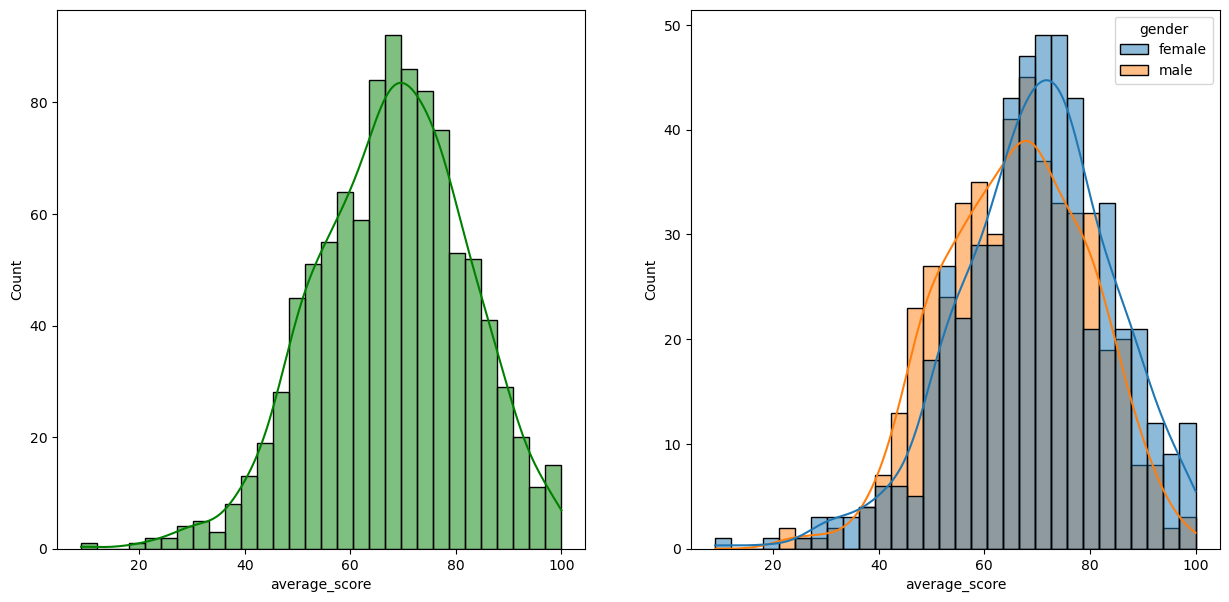

In [18]:
# Explore more visualisation
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True, color='green') # kde=Kernel Density Estimator
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='gender')
plt.show()

### Insights
- Female students tend to performe well than male students

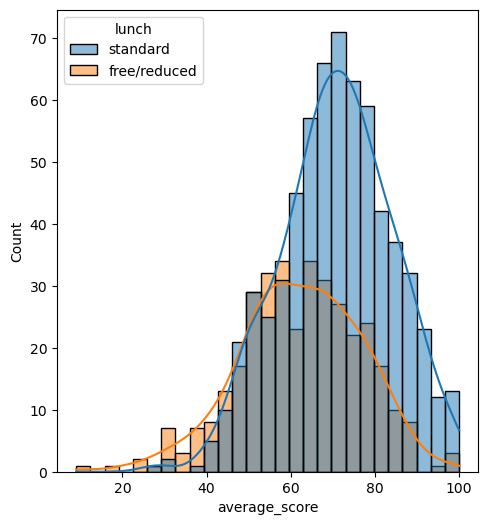

In [19]:
plt.figure(figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',bins=27,kde=True,hue='lunch')
plt.show()

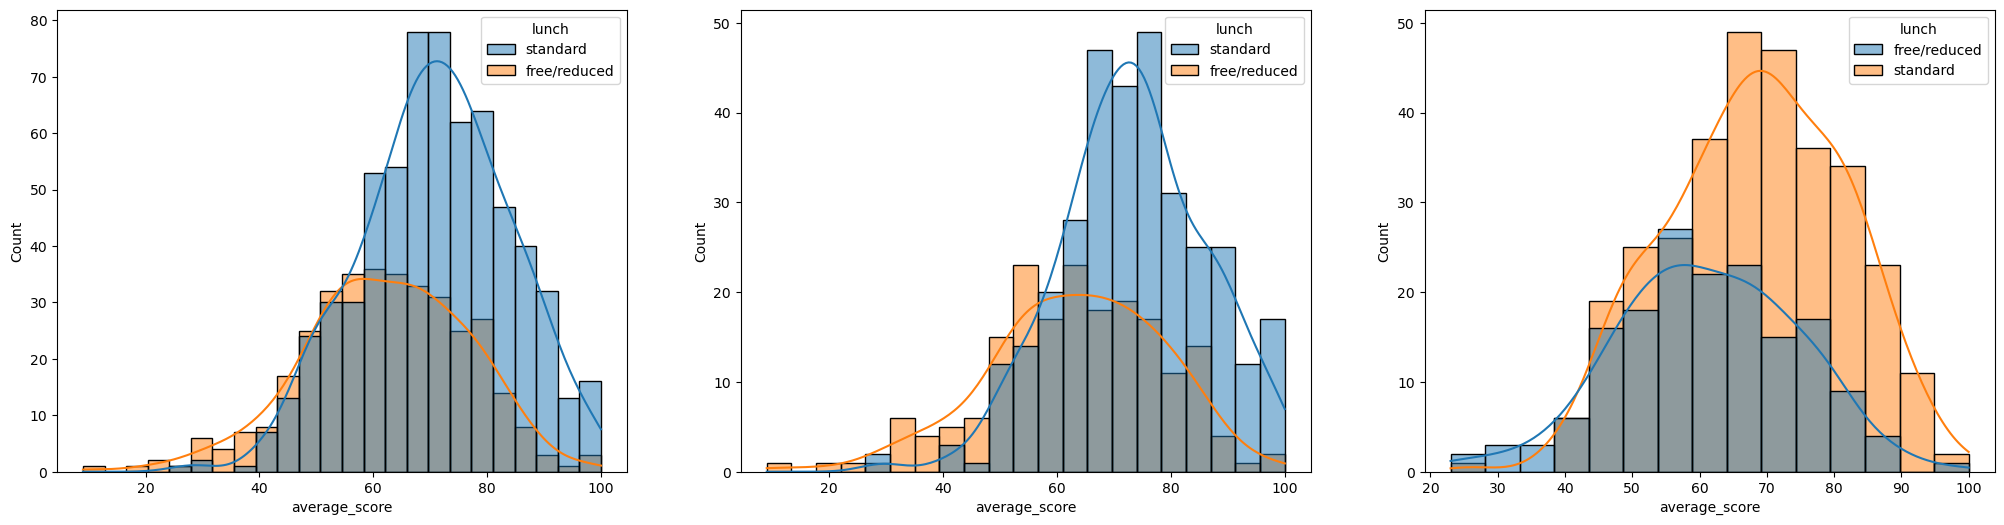

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

### Insights
- Standard lunch help students performe well in exams
- Standard lunch helps performe well in exams be it a male of female

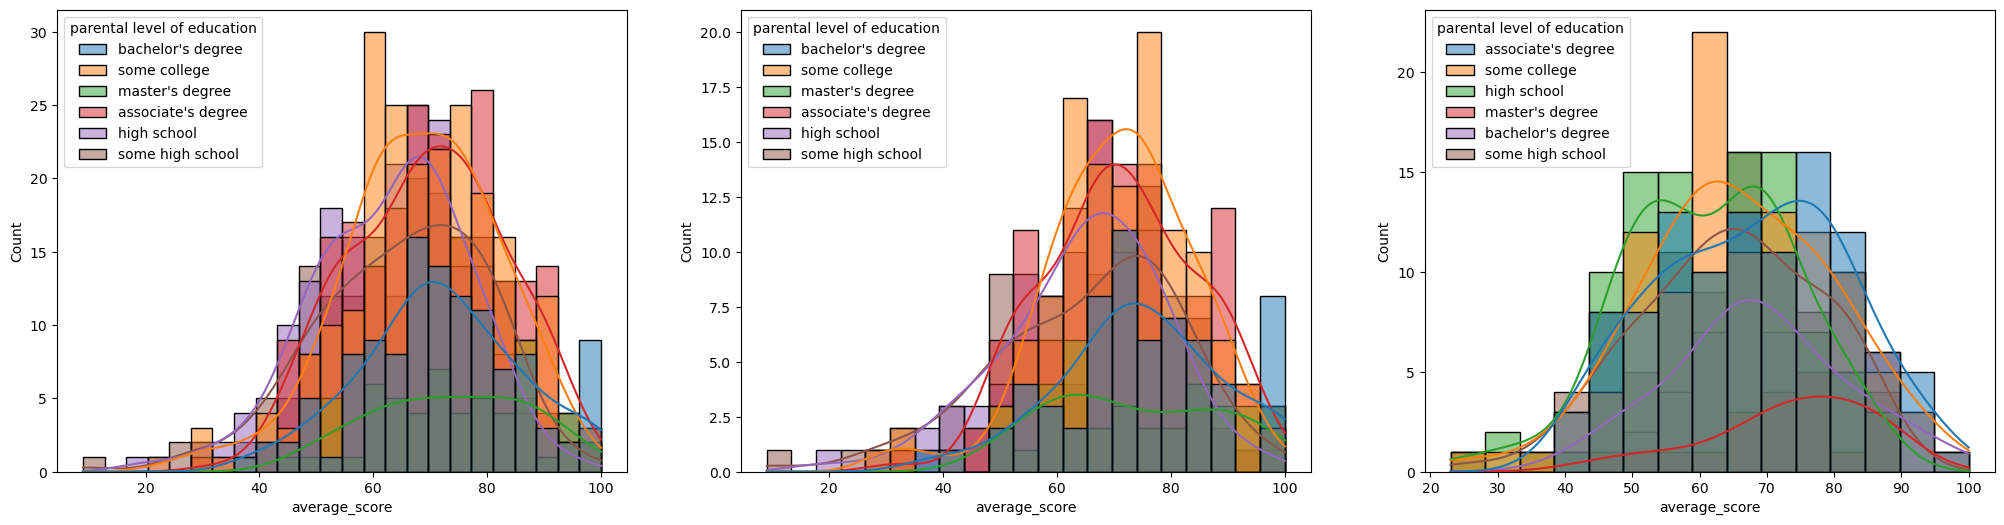

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.show()

### Insights
- In general parent's education don't hep student performe well in exam.
- 3rd plot shows that parent's whse education is of associate's degree or master's degree their male child tend to performe well in in exam.
- 2nd plot we can see there is no effect of parent's education on female students.

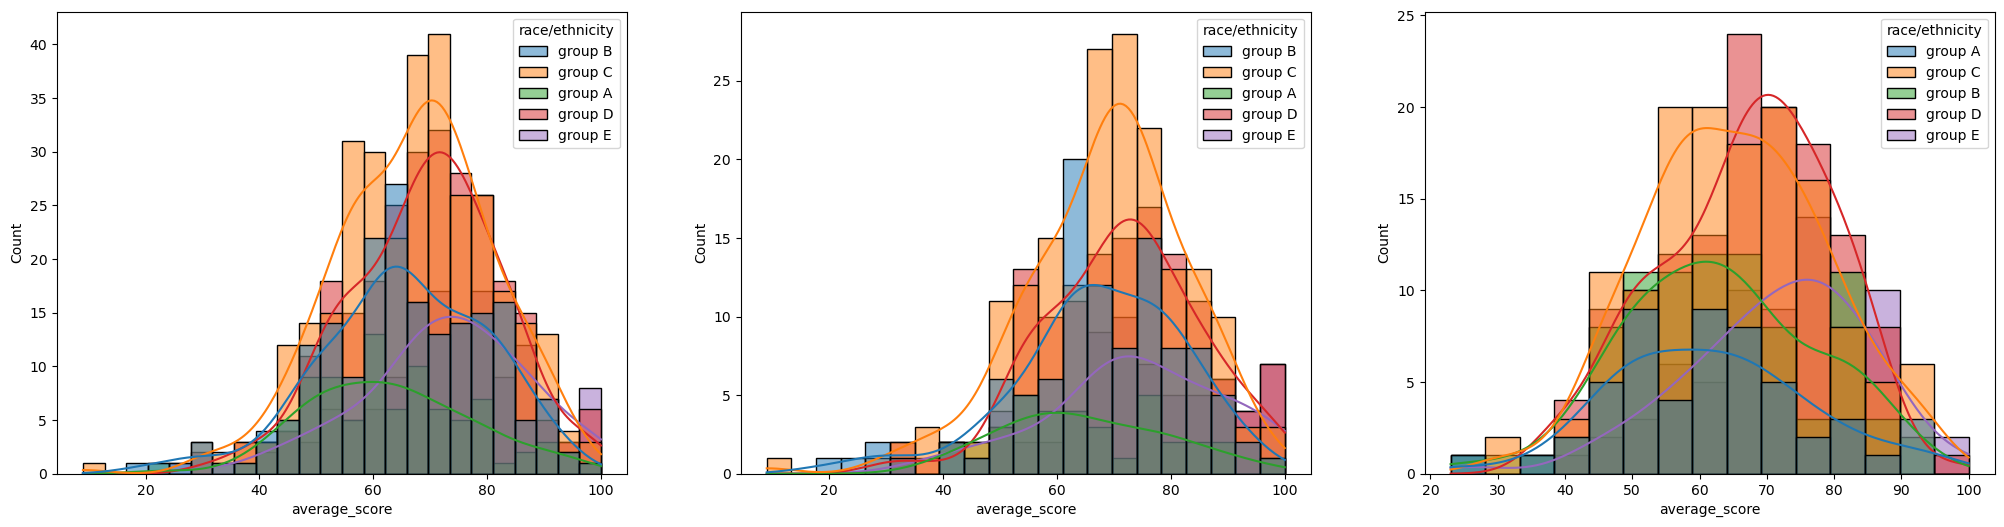

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.show()

### Insights
- Students of group A and group B tend to performe poorly in exam.
- Students of group A and group B tend to perfore poorly in exam irrespective of whether they are male or female.